In [1]:
display("text/html", "<style>.container { width:100% !important; }</style>")

In [2]:
using Plots
using Distributed
using LinearAlgebra

num_cores = length(Sys.cpu_info()) # 96 cores were used below
if nprocs()==1
    addprocs(num_cores; exeflags=`--project=$(Base.active_project())`)
end

@everywhere begin
    using LatticeAlgorithms
    using LinearAlgebra
    using Dates
    using BlockDiagonals
end
using JLD2

      From worker 30:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 30:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 9:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 9:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 12:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 12:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 43:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 43:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 10:	┌ Info: CondaPkg: Waiting for lock to be

      From worker 74:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 74:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 35:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 35:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 72:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 72:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 3:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 3:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 26:	┌ Info: CondaPkg: Waiting for lock to be

      From worker 78:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 78:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 8:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 8:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 23:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 23:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 47:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 47:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 54:	┌ Info: CondaPkg: Waiting for lock to be

      From worker 41:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 41:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 84:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 84:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 22:	┌ Info: CondaPkg: Waiting for lock to be freed. You may delete this file if no other process is resolving.
      From worker 22:	└   lock_file = "/local/home/maolinml/run_test/latticealgorithms.jl/.CondaPkg/lock"
      From worker 42:	ErrorException("Process(42) - Invalid connection credentials sent by remote.")CapturedException(ErrorException("Process(42) - Invalid connection credentials sent by remote."), Any[(error(s::String) at error.jl:35, 1), (process_hdr(s::Sockets.TCPSocket, validate_cookie::Boo

In [21]:
@everywhere begin

    type_lattice = "513_hex"
    num_qubits = 5
    S_hex = [2 1; 0 √3] / (12)^(1/4) # cannot be [2 0; 1 √3] / (12)^(1/4)
    S_hex_T = Matrix(transpose(S_hex))
    bigS = BlockDiagonal([S_hex for _ in 1:num_qubits])
    bigS_T = BlockDiagonal([S_hex_T for _ in 1:num_qubits])
    
    X = √π * bigS * [1,0,1,0,1,0,1,0,1,0]
    Z = √π * bigS * [0,1,0,1,0,1,0,1,0,1]
    Y = X+Z
    
    M_513 = [
        1 0 0 1 0 1 1 0 0 0; 
        0 2 0 0 0 0 0 0 0 0; 
        0 0 1 0 0 1 0 1 1 0; 
        0 0 0 2 0 0 0 0 0 0;
        1 0 0 0 1 0 0 1 0 1; 
        0 0 0 0 0 2 0 0 0 0; 
        0 1 1 0 0 0 1 0 0 1; 
        0 0 0 0 0 0 0 2 0 0; 
        0 0 0 0 0 0 0 0 2 0; 
        0 0 0 0 0 0 0 0 0 2
    ]
    
    M = M_513/√2 * bigS_T
    Mperp = GKP_logical_operator_generator(M)
    Ω = Ω_matrix(M)
    
    ###
    gs = Dict{Int, Vector{Int}}()
    for i in 1 : 4
        gs[length(gs)+1] = findall(x->x!=0, M_513[2i-1, :])
    end
    
    stabilizers = get_stabilizer_group_from_generators(collect(values(gs)))
    stabilizers = sort.(stabilizers)
    
    indicators_513_hex = [zeros(Int, 5) for _ in stabilizers] ;
    for (ind, stab) in enumerate(stabilizers)
        for i in 1 : 5
            if 2i-1 ∈ stab && 2i ∈ stab
                indicators_513_hex[ind][i] = 3
            elseif 2i-1 ∉ stab && 2i ∈ stab
                indicators_513_hex[ind][i] = 2
            elseif 2i-1 ∈ stab && 2i ∉ stab
                indicators_513_hex[ind][i] = 1
            else
            end
        end
    end
end

σrange = vcat(0.50:0.01:0.59, 0.591:0.001:0.607, exp(-1/2))

num_samples = Int(1e7)

num_samples_each_core = Int(ceil(num_samples/num_cores))
num_total_samples = Int(num_samples_each_core * num_cores);
println([num_samples_each_core, num_samples, num_total_samples])

logfile = "mld_$(type_lattice)_$(min(σrange...))_$(max(σrange...))_$(num_total_samples)_log.txt"
    open(logfile, "w") do file
end

[104167, 10000000, 10000032]


In [22]:
@time results = pmap(1:num_cores) do _
    p_list = Dict(σrange.=>[[0.0, 0.0, 0.0, 0.0] for _ in 1 : length(σrange)])
    t_list = Dict(σrange.=>[0.0 for _ in 1 : length(σrange)])

    for (ind_σ, σ) in enumerate(σrange)

        p = [0.0, 0.0, 0.0, 0.0]
        t = 0        

        σtime = @elapsed for _ in 1 : num_samples_each_core
            ξ = σ * randn(2num_qubits)

            ξ2 = -√(2π) * M * Ω * ξ
            s = ξ2 - floor.(ξ2/(2π)) * 2π
            ηs = -transpose(Ω*Mperp) * s/√(2π) ; 
            b = inv(√(2π) * transpose(Mperp)) * (ηs-ξ)
            @assert norm(round.(Int, b) - b) < 1e-10   

            t += @elapsed begin
                lstar, prob_I, prob_X, prob_Y, prob_Z = brute_force_mld_concatenated_non_square(ηs, σ, X, Z, indicators_513_hex; S = S_hex, Nv=5)
                
                rec = -ηs + lstar
                final_error = (rec+ξ)

                nx = transpose(final_error) * Ω * Z / π
                nz = transpose(final_error) * Ω * X / π
                nx = mod(round(nx), 2)
                nz = mod(round(nz), 2)
                @assert round.(Int, nx) ≈ nx
                @assert round.(Int, nz) ≈ nz  

                ##########
                if nx ≈ 0 && nz ≈ 0
                    p[1] += 1
                elseif nx ≈ 1 && nz ≈ 0
                    p[2] += 1
                elseif nx ≈ 0 && nz ≈ 1
                    p[3] += 1
                elseif nx ≈ 1 && nz ≈ 1
                    p[4] += 1
                end    
                
            end
        end
        p_list[σ] += p
        t_list[σ] += t

        if myid() == 2 # Print the progress of the 2nd worker
            println(["$(ind_σ)/$(length(σrange)), $(σtime), $(string(now()))"])
        end
    end
    
    return p_list, t_list
end ;     

t_list = merge(+, [res[2] for res in results]...) 
p_list = merge(+, [res[1] for res in results]...)

map!(v->v./num_total_samples, values(t_list))
map!(v->v./num_total_samples, values(p_list))

c_list = Dict()

for (k, v) in p_list
    c_list[k] = coherent_information_pauli_channel(v[2], v[4], v[3])
end

# Save the result
fn = "mld_$(type_lattice)_$(min(σrange...))_$(max(σrange...))_$(num_total_samples).jld2";
jldsave(fn; 
    σrange=σrange, 
    num_samples=num_samples_each_core*num_cores,
    p_list = p_list,
    t_list = t_list,
    c_list = c_list,
)


      From worker 2:	["1/28, 1305.166280691, 2024-10-13T07:12:39.678"]
      From worker 2:	["2/28, 1306.689999429, 2024-10-13T07:34:26.370"]
      From worker 2:	["3/28, 1303.949276474, 2024-10-13T07:56:10.320"]
      From worker 2:	["4/28, 1307.103938075, 2024-10-13T08:17:57.425"]
      From worker 2:	["5/28, 1311.840373574, 2024-10-13T08:39:49.266"]
      From worker 2:	["6/28, 1309.907342976, 2024-10-13T09:01:39.174"]
      From worker 2:	["7/28, 1314.295265772, 2024-10-13T09:23:33.470"]
      From worker 2:	["8/28, 1366.557462112, 2024-10-13T09:46:20.029"]
      From worker 2:	["9/28, 1359.14527434, 2024-10-13T10:08:59.175"]
      From worker 2:	["10/28, 1330.566112233, 2024-10-13T10:31:09.742"]
      From worker 2:	["11/28, 1311.569286878, 2024-10-13T10:53:01.313"]
      From worker 2:	["12/28, 1341.68073213, 2024-10-13T11:15:22.995"]
      From worker 2:	["13/28, 1361.189049783, 2024-10-13T11:38:04.185"]
      From worker 2:	["14/28, 1363.657612665, 2024-10-13T12:00:47.844"]
   

In [23]:
sort(load(fn)["p_list"])

OrderedCollections.OrderedDict{Float64, Vector{Float64}} with 28 entries:
  0.5   => [0.933494, 0.0221577, 0.0221965, 0.0221515]
  0.51  => [0.920035, 0.0266788, 0.0266564, 0.0266295]
  0.52  => [0.905407, 0.0316023, 0.031505, 0.0314862]
  0.53  => [0.889447, 0.0368257, 0.0367697, 0.0369577]
  0.54  => [0.872339, 0.0424665, 0.0425607, 0.0426338]
  0.55  => [0.854032, 0.0487339, 0.0486652, 0.0485687]
  0.56  => [0.834881, 0.0550151, 0.0550213, 0.0550821]
  0.57  => [0.814733, 0.0617233, 0.0617379, 0.0618054]
  0.58  => [0.79383, 0.0686819, 0.0687045, 0.0687841]
  0.59  => [0.772696, 0.0757411, 0.0757996, 0.0757638]
  0.591 => [0.77037, 0.0764654, 0.0766611, 0.0765035]
  0.592 => [0.768234, 0.0772041, 0.077292, 0.0772696]
  0.593 => [0.766083, 0.0779472, 0.0779536, 0.0780163]
  0.594 => [0.763517, 0.0789317, 0.0787498, 0.0788009]
  0.595 => [0.761594, 0.0794982, 0.0794139, 0.0794937]
  0.596 => [0.759396, 0.0801766, 0.080156, 0.0802709]
  0.597 => [0.757349, 0.0808725, 0.0808155, 0.08096

# Compare to existing data

In [24]:
function get_p0list_sorted(p_list, drange, σrange)
    p0list_sorted = sort(p_list)
    p0list_sorted = collect(values(p0list_sorted))
    p0list_sorted = reshape(p0list_sorted, (length(drange), length(σrange)))
    p0list_sorted = [p0list_sorted[:,i] for i in 1:size(p0list_sorted,2)]
    return p0list_sorted
end


get_p0list_sorted (generic function with 1 method)

In [25]:
new_data = sort(load(fn))
new_p_list = new_data["p_list"]
new_p_list_sorted = get_p0list_sorted(new_p_list, [1], σrange)

28-element Vector{Vector{Vector{Float64}}}:
 [[0.933494212818519, 0.022157729095266896, 0.022196528971107292, 0.02215152911510683]]
 [[0.9200352558871812, 0.02667881462779319, 0.026656414699472962, 0.026629514785552685]]
 [[0.9054065026991913, 0.031602298872643604, 0.03150499918400261, 0.03148619924416242]]
 [[0.8894469537697479, 0.0368256821578171, 0.036769682337016524, 0.03695768173541845]]
 [[0.8723391085148527, 0.042466464107314854, 0.04256066380587582, 0.04263376357195657]]
 [[0.8540320670973853, 0.048733944051379034, 0.04866524427121833, 0.048568744580017344]]
 [[0.8348814283794291, 0.05501512395160336, 0.05502132393176342, 0.05508212373720404]]
 [[0.8147333928531428, 0.06172330248543205, 0.061737902438712196, 0.061805402222712885]]
 [[0.7938295597454088, 0.0686818802179833, 0.06870448014566354, 0.06878407989094434]]
 [[0.7726956273739924, 0.07574105762861559, 0.07579955744141618, 0.07576375755597582]]
 [[0.7703701348155686, 0.076465355310863, 0.07666105468462502, 0.0765034551889

In [26]:
## 
old_data_1 = sort(load("data/mld_513_hex_0.5_0.6_10002496.jld2"))
old_p_list_1 = old_data_1["p_list"]
old_p_list_1_sorted = get_p0list_sorted(old_p_list_1, [3], old_data_1["σrange"])
display(old_p_list_1_sorted)

old_data_2 = sort(load("data/mld_513_hex_0.601_0.607_10002496.jld2"))
old_p_list_2 = old_data_2["p_list"]
old_p_list_2_sorted = get_p0list_sorted(old_p_list_2, [3], old_data_2["σrange"])
display(old_p_list_2_sorted)

11-element Vector{Vector{Vector{Float64}}}:
 [[0.9333829276212657, 0.022217054623166057, 0.02222155350024634, 0.022178464255321873]]
 [[0.9201401330227975, 0.026702035172021063, 0.02656896838549098, 0.026588863419690446]]
 [[0.9057346286366923, 0.031375068782831805, 0.03147404407859798, 0.03141625850187793]]
 [[0.8896706382087031, 0.036789117436287905, 0.03678961731151904, 0.03675062704348994]]
 [[0.8723111711316855, 0.04245930215818132, 0.0425972677219766, 0.042632258988156556]]
 [[0.8540802215766945, 0.0487581299707593, 0.048587372591801084, 0.048574275860745156]]
 [[0.8348793141231948, 0.054941486604943406, 0.05508355114563405, 0.05509564812622769]]
 [[0.814618871129766, 0.06179447609876575, 0.0618276678141136, 0.06175898495735464]]
 [[0.7939416321686107, 0.06873514370813046, 0.06870285176819865, 0.06862037235506017]]
 [[0.7725290767424451, 0.07598033530830704, 0.0757746866382151, 0.07571590131103277]]
 [[0.7508082982487571, 0.08307306496298524, 0.08304197272360819, 0.08307666406464

7-element Vector{Vector{Vector{Float64}}}:
 [[0.7485550606568601, 0.08370640688084253, 0.08379748414795667, 0.08394104831434074]]
 [[0.7461961494410995, 0.08462627728119061, 0.08456969140502531, 0.08460788187268457]]
 [[0.7440611823288907, 0.08531200612327162, 0.08526891687834716, 0.0853578946694905]]
 [[0.7416873748312421, 0.08612920215114307, 0.08613190147739125, 0.08605152154022357]]
 [[0.7397505582606582, 0.08679163680745286, 0.08675304643960867, 0.08670475849228032]]
 [[0.7370170405466796, 0.08769491135012701, 0.08767371664032657, 0.08761433146286687]]
 [[0.7352537806563482, 0.08817109249531317, 0.08829246220143452, 0.08828266464690414]]

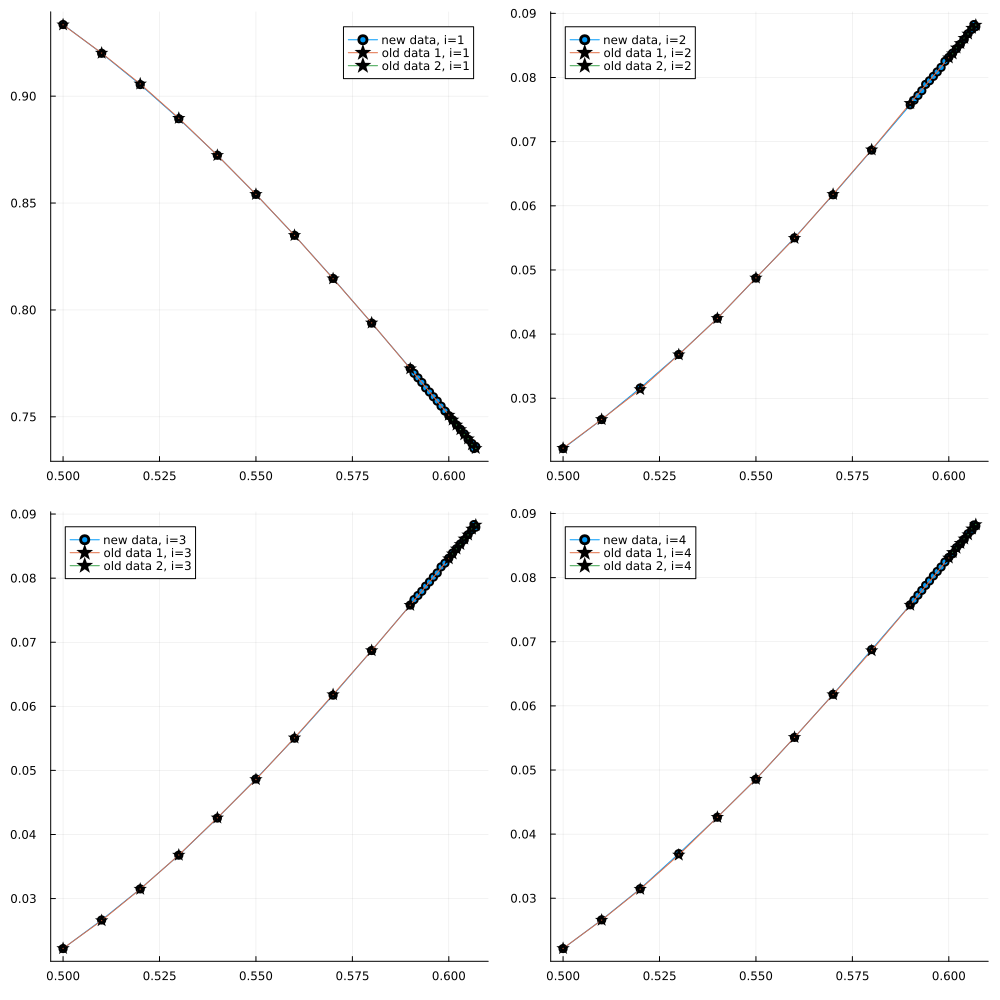

In [29]:
gs = []
for i in 1:4
    g = plot()
    plot!(σrange, [item[1][i] for item in new_p_list_sorted], marker=:circle, label="new data, i=$i")
    plot!(old_data_1["σrange"], [item[1][i] for item in old_p_list_1_sorted], marker=:star, label="old data 1, i=$i")
    plot!(old_data_2["σrange"], [item[1][i] for item in old_p_list_2_sorted], marker=:star, label="old data 2, i=$i")    
    push!(gs, g)
end
plot(gs..., size=(1000, 1000))